In [1]:
%matplotlib widget
import data_loader_module as dl
from pathlib import Path
import pandas as pd
import numpy as np
import preprocessing_module as dl_prep
import visualization_module as dl_viz
import pca_module as pca_mod
import matplotlib.patches as mpatches

# También es buena idea poner la configuración de Pandas aquí
pd.set_option('display.max_rows', 200)
pd.set_option('display.width', 1000)

print("Módulos y configuración listos.")

Módulos y configuración listos.


In [3]:
# --- DICCIONARIO DE MAPEO PARA NOMBRES DE INDICADORES ---
MAPEO_INDICADORES = {
    # --- NUEVOS INDICADORES (donde el nombre de la hoja es el nombre descriptivo) ---
    'Adjusted savings  education exp': 'GED%PIB',
    'Compulsory education': 'EDOBLAÑ',
    'Expenditure on tertiary educati': 'GEDTER%',
    'GDP growth (annual %)': 'PIBCRE%',
    'GDP per capita growth (annual %': 'PIB/HCRE%',
    'GDP per capita, PPP (constant 2': 'PIB/HPPP21',
    'Gov exp on educ % GDP': 'GGUBED%PIB',
    'Gov exp on educa (% of gov exp)': 'GGUBED%GUB',
    'Poverty headc. ratio at $2.15': 'POB2.15%POB',
    'Poverty headc. ratio at $3.65': 'POB3.65%POB',
    'Poverty headcount ratio at $6.8': 'POB6.85%POB',
    'Poverty headcount ratio at nati': 'POBNAC%POB',
    'Poverty headcount ratio at soci': 'POBSOC%POB',
    'Prop. of pop. spendi more 25%': 'POB25%SAL',
    'Prop. of time on unp. dom. fema': '%TIEDOMMUJ',
    'Prop. of time on unp. dom. male': '%TIEDOMHOM',
    'R&d expendi % GDP': 'IN&DES%PIB',
    'School enroll, tertiy, fem': 'MAESCTERMUJ',
    'Carbon intensity of GDP': 'INTCARPPP21',
    'Intensidad carbon PPP 2015': 'INTCARPPP15',
    'Energy intensity PPP GDP': 'INTENEPPP17',
    'School enroll terti total': 'MATRBRTOT',
    'Researchers in R&D (per million': 'INV/HAB'
    # Asegurarse que la CLAVE sea EXACTAMENTE el nombre de la hoja en el EXCEL :).
}

# MAPEO_INDICADORES = {
#     # --- NUEVOS INDICADORES (donde el nombre de la hoja es el nombre descriptivo) ---
#     'Adjusted savings  education exp': 'Ahorro ajustado: gasto en educación (% del PIB)',
#     'Compulsory education, duration': 'Educación obligatoria, duración (años)',
#     'Expenditure on tertiary educati': 'Gasto en educación terciaria (% del gasto gubernamental en educación)',
#     'GDP growth (annual %)': 'Crecimiento del PIB (% anual)',
#     'GDP per capita growth (annual %': 'Crecimiento del PIB per cápita (% anual)',
#     'GDP per capita, PPP (constant 2': 'PIB per cápita, PPA ($ constantes internacionales de 2021)',
#     'Gov exp on educa (% of GDP)': 'Gasto gubernamental en educación, total (% del PIB)',
#     'Gov exp on educa (% of gov exp)': 'Gasto gubernamental en educación, total (% del gasto gubernamental)',
#     'Poverty headc. ratio at $2.15': 'Tasa de incidencia de la pobreza a $2.15 por día (PPA 2017) (% de la población)',
#     'Poverty headc. ratio at $3.65': 'Tasa de incidencia de la pobreza a $3.65 por día (PPA 2017) (% de la población)',
#     'Poverty headc. ratio at $6.85': 'Tasa de incidencia de la pobreza a $6.85 por día (PPA 2017) (% de la población)',
#     'Poverty headcount ratio at nati': 'Tasa de incidencia de la pobreza según las líneas de pobreza nacionales (% de la población)',
#     'Poverty headcount ratio at soci': 'Tasa de incidencia de la pobreza según la línea de pobreza social (% de la población)',
#     'Prop. of pop. spendi more 25%': 'Proporción de la población que gasta más del 25% del consumo o ingreso del hogar en gastos de salud directos (%)',
#     'Prop. of time on unp. dom. fema': 'Proporción del tiempo dedicado al trabajo doméstico y de cuidados no remunerado, mujeres (% de un día de 24 horas)',
#     'Prop. of time on unp. dom. male': 'Proporción del tiempo dedicado al trabajo doméstico y de cuidados no remunerado, hombres (% de un día de 24 horas)',
#     'Research and development expend': 'Gasto en investigación y desarrollo (% del PIB)',
#     'School enroll., tertiary, femal': 'Matriculación escolar, terciaria, mujeres (% bruto)',
#     'School enroll., tertiary, male': 'Matriculación escolar, terciaria, hombres (% bruto)',
#     'Intensidad carbon PPP 2021': 'Intensidad de carbono PPA 2021',
#     'Intensidad carbon PPP 2015': 'Intensidad de carbono PPA 2015',
#     'Intensidad energia 2017 PPP ': 'Intensidad de energía PPA 2017',   
#     'gross enrolmet total ': 'Matriculación bruta, total',
#     'Investigador por habitante': 'Investigador por habitante'
# }



# --- DICCIONARIO DE GRUPOS DE PAÍSES ---
COUNTRY_GROUPS = {
    # Neoliberales Avanzados
    'AUS': 'Neoliberales Avanzados', 'BEL': 'Neoliberales Avanzados', 'CAN': 'Neoliberales Avanzados',
    'CZE': 'Neoliberales Avanzados', 'FRA': 'Neoliberales Avanzados', 'DEU': 'Neoliberales Avanzados',
    'LUX': 'Neoliberales Avanzados', 'NLD': 'Neoliberales Avanzados', 'ESP': 'Neoliberales Avanzados',
    'CHE': 'Neoliberales Avanzados', 'GBR': 'Neoliberales Avanzados', 'USA': 'Neoliberales Avanzados',
    'NZL': 'Neoliberales Avanzados', 'AUT': 'Neoliberales Avanzados',

    # Neoliberales tardíos
    'GRC': 'Neoliberales tardíos', 'HUN': 'Neoliberales tardíos', 'IRL': 'Neoliberales tardíos',
    'LVA': 'Neoliberales tardíos', 'MEX': 'Neoliberales tardíos', 'POL': 'Neoliberales tardíos',
    'PRT': 'Neoliberales tardíos', 'SVK': 'Neoliberales tardíos', 'SVN': 'Neoliberales tardíos',
    'TUR': 'Neoliberales tardíos', 'CHL': 'Neoliberales tardíos', 'EST': 'Neoliberales tardíos',
    'HRV': 'Neoliberales tardíos','LTU': 'Neoliberales tardíos',

    # Escandinavos
    'FIN': 'Escandinavos', 'DNK': 'Escandinavos', 'NOR': 'Escandinavos', 'SWE': 'Escandinavos',
    'ISL': 'Escandinavos',

    # Asiáticos
    'CHN': 'Asiáticos', 'IND': 'Asiáticos', 'IDN': 'Asiáticos', 'JPN': 'Asiáticos',
    'KOR': 'Asiáticos', 'SGP': 'Asiáticos', 'MYS': 'Asiáticos', 'THA': 'Asiáticos',
    
    # Otros (Latinoamérica, etc.)
    'ARG': 'Otros', 'BRA': 'Otros', 'COL': 'Otros', 'CRI': 'Otros',
    'ECU': 'Otros', 'PER': 'Otros', 'URY': 'Otros', 'VNM': 'Otros'
}

# --- DICCIONARIO PARA MAPEAR CÓDIGOS A NOMBRES ---
# Se usa para mostrar un menú amigable al usuario.
CODE_TO_NAME = {
    'ARG': 'Argentina', 'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 
    'BRA': 'Brazil', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile',
    'CHN': 'China', 'COL': 'Colombia', 'CRI': 'Costa Rica', 'HRV': 'Croatia', 
    'CZE': 'Czechia', 'DEU': 'Germany', 'DNK': 'Denmark', 'ECU': 'Ecuador',
    'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 
    'GBR': 'United Kingdom', 'GRC': 'Greece', 'HUN': 'Hungary', 'IDN': 'Indonesia',
    'IND': 'India', 'IRL': 'Ireland', 'ISL': 'Iceland', 'ITA': 'Italy', 'JPN': 'Japan',
    'KOR': 'Korea, Rep.', 'LVA': 'Latvia', 'LUX': 'Luxembourg', 'MEX': 'Mexico',
    'MYS': 'Malaysia', 'NLD': 'Netherlands', 'NOR': 'Norway', 'NZL': 'New Zealand',
    'PER': 'Peru', 'POL': 'Poland', 'PRT': 'Portugal', 'SGP': 'Singapore', 
    'SVK': 'Slovak Republic', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'THA': 'Thailand',
    'TUR': 'Turkiye', 'URY': 'Uruguay', 'USA': 'United States', 'VNM': 'Viet Nam', 'LTU': 'Lithuania'
    # Agrega más códigos si es necesario
}

# --- DICCIONARIO DE COLORES PARA LOS GRUPOS (ESTÁ BIEN COMO LO TENÍAS) ---
GROUP_COLORS = {
    'Neoliberales Avanzados': 'blue',
    'Neoliberales tardíos': 'green',
    'Escandinavos': 'purple',
    'Asiáticos': 'orange',
    'Otros': 'gray'
}


# --- CONFIGURACIÓN ---
FILE_PATH = Path(r"C:\Users\messi\OneDrive\Escritorio\escuela\Servicio Social\Python\PCA\Indc WDI_V4.xlsx")
OUTPUT_DIR = Path(r"C:\Users\messi\OneDrive\Escritorio\escuela\Servicio Social\Python\PCA\Excels guardados")

In [4]:
# --- CARGA DE DATOS ---
all_sheets_data = dl.load_excel_file(FILE_PATH)
if all_sheets_data:
    available_sheet_names_list = list(all_sheets_data.keys())
    print("¡Archivo Excel cargado exitosamente!")
else:
    print("Error al cargar el archivo Excel.")

DEBUG MODULE: Función load_excel_file llamada con ruta: C:\Users\messi\OneDrive\Escritorio\escuela\Servicio Social\Python\PCA\Indc WDI_V4.xlsx
DEBUG MODULE: Tipo de file_path: <class 'pathlib.WindowsPath'>
DEBUG MODULE: Intentando pd.ExcelFile() con: C:\Users\messi\OneDrive\Escritorio\escuela\Servicio Social\Python\PCA\Indc WDI_V4.xlsx

--- MODULE Cargando hojas del archivo: C:\Users\messi\OneDrive\Escritorio\escuela\Servicio Social\Python\PCA\Indc WDI_V4.xlsx ---
DEBUG MODULE: Hojas encontradas en el archivo: ['GDP growth (annual %)', 'GDP per capita, PPP (constant 2', 'GDP per capita growth (annual %', 'Poverty headcount ratio at soci', 'Poverty headcount ratio at $6.8', 'Gov exp educ total % gov', 'Gov exp on educ % GDP', 'Compulsory education', 'School enroll terti total', 'School enroll, terti, male', 'School enroll, tertiy, fem', 'Researchers in R&D (per million', 'R&d expendi % GDP', 'Carbon intensity of GDP', 'Energy intensity PPP GDP']
DEBUG MODULE: Intentando parsear la hoja 

--- Iniciando análisis para el año: 2019 ---

--- Preparando datos de corte transversal para el año: 2019 ---
Advertencia: Indicador 'Compulsory education, duration ' no encontrado. Se omitirá.
Advertencia: Indicador 'Gov exp on educa (% of GDP)' no encontrado. Se omitirá.
Advertencia: Indicador 'Research and development expend' no encontrado. Se omitirá.
Advertencia: Indicador 'Poverty headcount ratio at $6.85' no encontrado. Se omitirá.
DataFrame para el año 2019 (primeras filas):
            GDP growth (annual %)  GDP per capita growth (annual %  GDP per capita, PPP (constant 2  Poverty headcount ratio at soci
Unnamed: 0                                                                                                                          
AUS                      2.171545                         0.673067                     57837.060688                             12.7
BEL                      2.442890                         1.890719                     60506.664749              

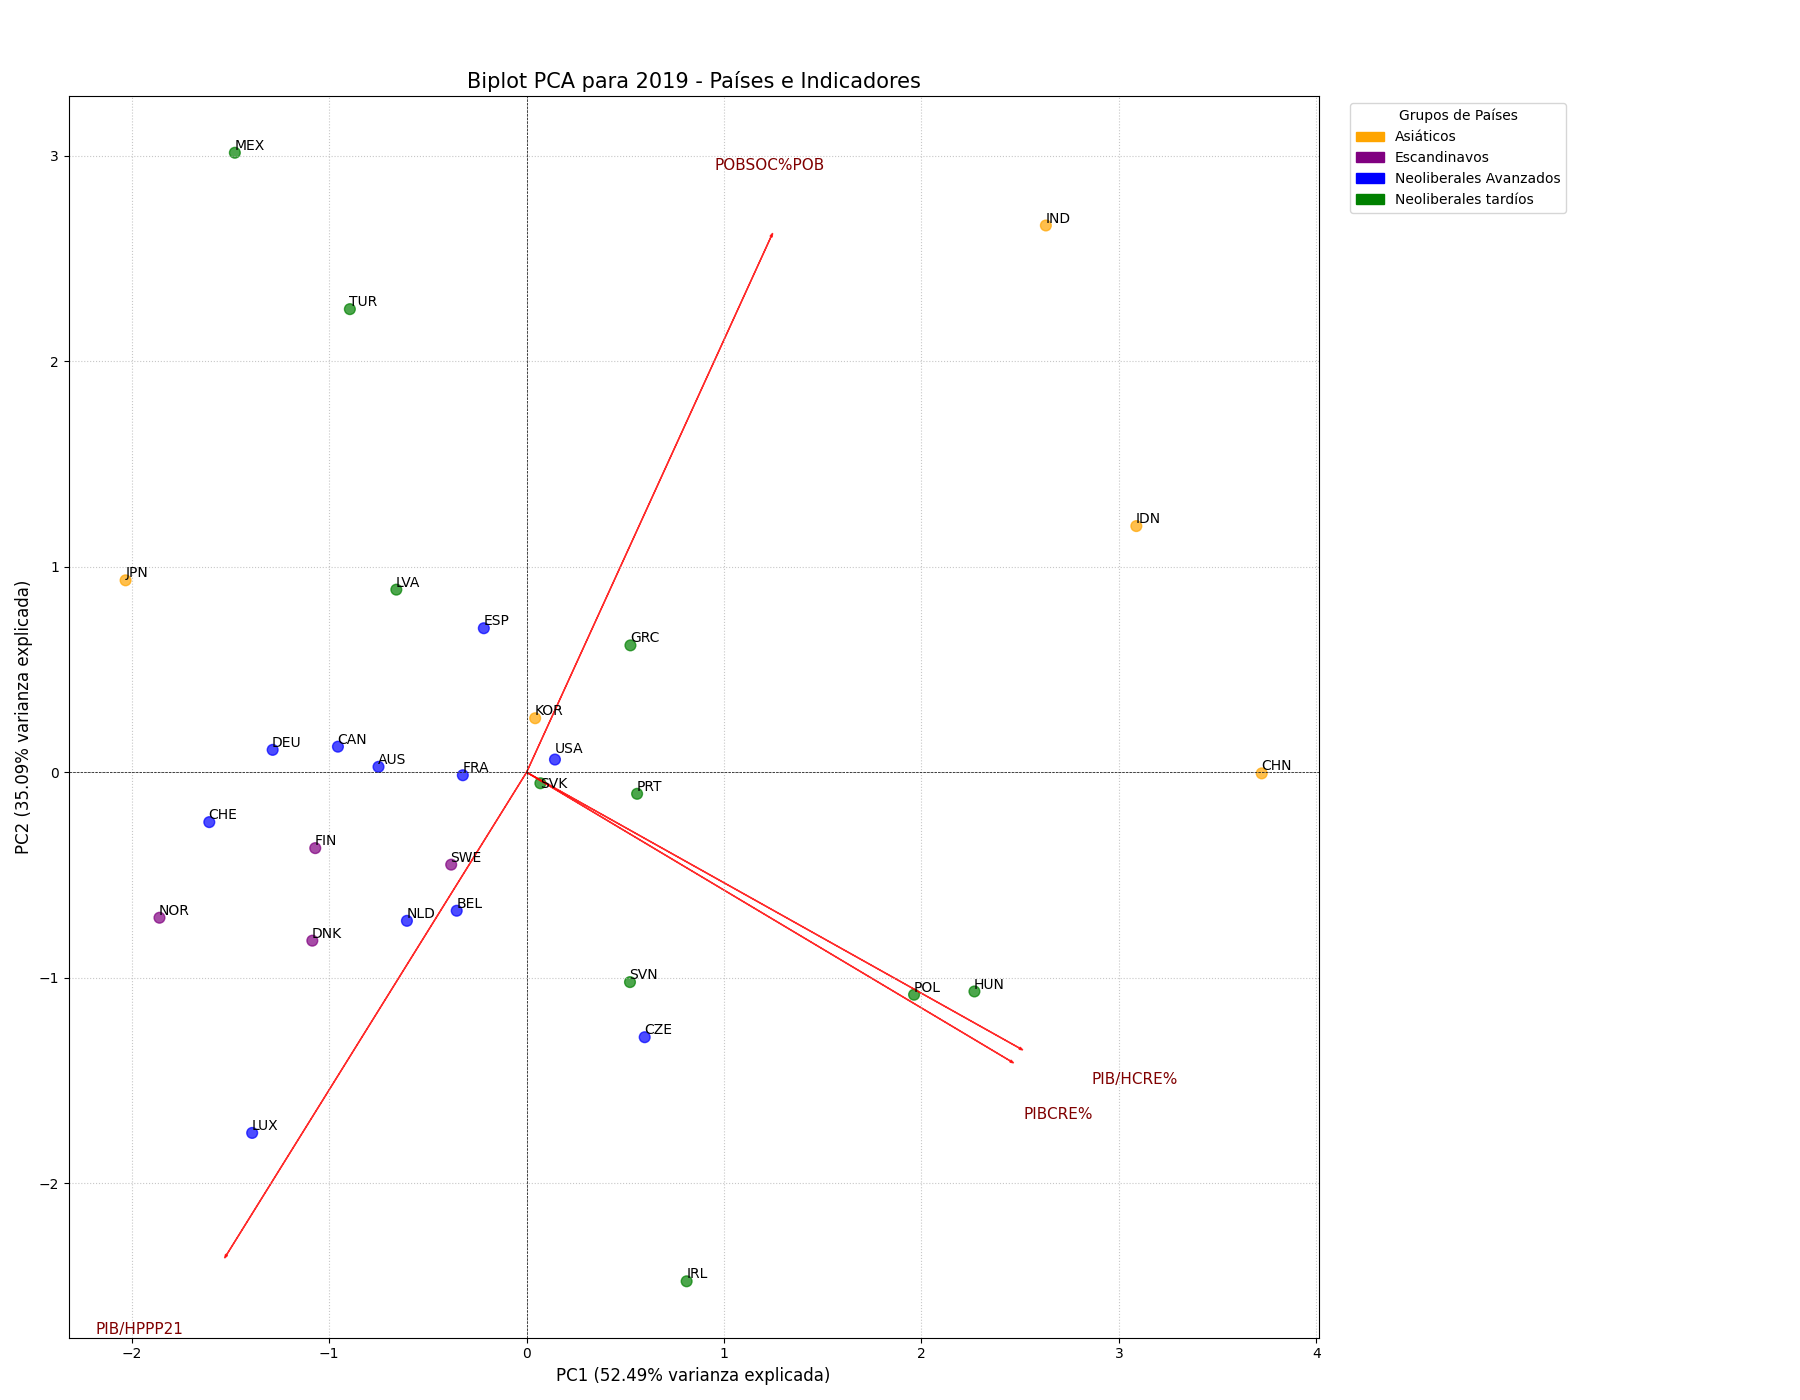

In [5]:
# 1. Define tus selecciones aquí mismo en el código
indicadores_a_usar_codigos = [
    'Compulsory education, duration ', 'Gov exp on educa (% of GDP)', 'Research and development expend', 
    'GDP growth (annual %)', 'GDP per capita growth (annual %', 'GDP per capita, PPP (constant 2', 
    'Poverty headcount ratio at $6.85', 'Poverty headcount ratio at soci'
]
paises_a_usar_codigos = ['AUS', 'BEL', 'CAN', 'CZE', 'FRA', 'DEU', 'LUX', 'NLD', 'ESP', 'CHE', 'GBR', 'USA', 'GRC', 'HUN', 'IRL', 'LVA', 'MEX', 'POL', 'PRT', 'SVK', 'SVN', 'TUR', 'FIN', 'DNK', 'NOR', 'SWE', 'CHN', 'IND', 'IDN', 'JPN', 'KOR']
ano_a_analizar = 2019

# 2. Ejecuta el proceso con esas selecciones
print(f"--- Iniciando análisis para el año: {ano_a_analizar} ---")
df_year_cross_section = dl.preparar_datos_corte_transversal(
    all_sheets_data, 
    indicadores_a_usar_codigos, 
    paises_a_usar_codigos, 
    ano_a_analizar
)

# 3. Limpia y procesa los datos
df_year_processed = df_year_cross_section.dropna(axis=0, how='any') # O usa imputación si lo prefieres
print(f"Número de países después de limpiar NaNs: {df_year_processed.shape[0]}")

if df_year_processed.shape[0] > 1 and df_year_processed.shape[1] > 1:
    df_year_estandarizado, _ = dl_prep.estandarizar_datos(df_year_processed, devolver_scaler=True)
    pca_model_cs, df_pc_scores_cs = pca_mod.realizar_pca(df_year_estandarizado, n_components=2)

    # 4. Genera el Biplot (la parte interactiva)
    if pca_model_cs and not df_pc_scores_cs.empty:
        paises_en_plot = df_pc_scores_cs.index.tolist()
        grupos_para_plot = [COUNTRY_GROUPS.get(code, 'Otros') for code in paises_en_plot]
        nombres_indicadores_mapeados_cs = [MAPEO_INDICADORES.get(code, code) for code in df_year_estandarizado.columns.tolist()]
        
        dl_viz.graficar_biplot_corte_transversal(
            pca_model_cs, df_pc_scores_cs, df_year_estandarizado.columns.tolist(),
            nombres_indicadores_mapeados_cs, paises_en_plot,
            grupos_individuos=grupos_para_plot, mapa_de_colores=GROUP_COLORS,
            titulo=f"Biplot PCA para {ano_a_analizar} - Países e Indicadores"
        )
else:
    print("No hay suficientes datos para realizar el análisis.")

In [ ]:
import data_loader_module as dl
from pathlib import Path
import pandas as pd
import numpy as np
import os
import preprocessing_module as dl_prep
import visualization_module as dl_viz
import pca_module as pca_mod


# Mostrar todas las filas al imprimir DataFrames
pd.set_option('display.max_rows', None)
pd.set_option('display.width', 1000)

# --- DICCIONARIO DE MAPEO PARA NOMBRES DE INDICADORES ---
MAPEO_INDICADORES = {
    # --- NUEVOS INDICADORES (donde el nombre de la hoja es el nombre descriptivo) ---
    'Adjusted savings  education exp': 'GED%PIB',
    'Compulsory education': 'EDOBLAÑ',
    'Expenditure on tertiary educati': 'GEDTER%',
    'GDP growth (annual %)': 'PIBCRE%',
    'GDP per capita growth (annual %': 'PIB/HCRE%',
    'GDP per capita, PPP (constant 2': 'PIB/HPPP21',
    'Gov exp on educ % GDP': 'GGUBED%PIB',
    'Gov exp on educa (% of gov exp)': 'GGUBED%GUB',
    'Poverty headc. ratio at $2.15': 'POB2.15%POB',
    'Poverty headc. ratio at $3.65': 'POB3.65%POB',
    'Poverty headcount ratio at $6.8': 'POB6.85%POB',
    'Poverty headcount ratio at nati': 'POBNAC%POB',
    'Poverty headcount ratio at soci': 'POBSOC%POB',
    'Prop. of pop. spendi more 25%': 'POB25%SAL',
    'Prop. of time on unp. dom. fema': '%TIEDOMMUJ',
    'Prop. of time on unp. dom. male': '%TIEDOMHOM',
    'R&d expendi % GDP': 'IN&DES%PIB',
    'School enroll, tertiy, fem': 'MAESCTERMUJ',
    'Carbon intensity of GDP': 'INTCARPPP21',
    'Intensidad carbon PPP 2015': 'INTCARPPP15',
    'Energy intensity PPP GDP': 'INTENEPPP17',
    'School enroll terti total': 'MATRBRTOT',
    'Researchers in R&D (per million': 'INV/HAB'
    # Asegurarse que la CLAVE sea EXACTAMENTE el nombre de la hoja en el EXCEL :).
}


# --- DICCIONARIO DE GRUPOS DE PAÍSES ---
COUNTRY_GROUPS = {
    # Neoliberales Avanzados
    'AUS': 'Neoliberales Avanzados', 'BEL': 'Neoliberales Avanzados', 'CAN': 'Neoliberales Avanzados',
    'CZE': 'Neoliberales Avanzados', 'FRA': 'Neoliberales Avanzados', 'DEU': 'Neoliberales Avanzados',
    'LUX': 'Neoliberales Avanzados', 'NLD': 'Neoliberales Avanzados', 'ESP': 'Neoliberales Avanzados',
    'CHE': 'Neoliberales Avanzados', 'GBR': 'Neoliberales Avanzados', 'USA': 'Neoliberales Avanzados',
    'NZL': 'Neoliberales Avanzados', 'AUT': 'Neoliberales Avanzados',

    # Neoliberales tardíos
    'GRC': 'Neoliberales tardíos', 'HUN': 'Neoliberales tardíos', 'IRL': 'Neoliberales tardíos',
    'LVA': 'Neoliberales tardíos', 'MEX': 'Neoliberales tardíos', 'POL': 'Neoliberales tardíos',
    'PRT': 'Neoliberales tardíos', 'SVK': 'Neoliberales tardíos', 'SVN': 'Neoliberales tardíos',
    'TUR': 'Neoliberales tardíos', 'CHL': 'Neoliberales tardíos', 'EST': 'Neoliberales tardíos',
    'HRV': 'Neoliberales tardíos','LTU': 'Neoliberales tardíos',

    # Escandinavos
    'FIN': 'Escandinavos', 'DNK': 'Escandinavos', 'NOR': 'Escandinavos', 'SWE': 'Escandinavos',
    'ISL': 'Escandinavos',

    # Asiáticos
    'CHN': 'Asiáticos', 'IND': 'Asiáticos', 'IDN': 'Asiáticos', 'JPN': 'Asiáticos',
    'KOR': 'Asiáticos', 'SGP': 'Asiáticos', 'MYS': 'Asiáticos', 'THA': 'Asiáticos',
    
    # Otros (Latinoamérica, etc.)
    'ARG': 'Otros', 'BRA': 'Otros', 'COL': 'Otros', 'CRI': 'Otros',
    'ECU': 'Otros', 'PER': 'Otros', 'URY': 'Otros', 'VNM': 'Otros'
}

# --- DICCIONARIO PARA MAPEAR CÓDIGOS A NOMBRES ---
# Se usa para mostrar un menú amigable al usuario.
CODE_TO_NAME = {
    'ARG': 'Argentina', 'AUS': 'Australia', 'AUT': 'Austria', 'BEL': 'Belgium', 
    'BRA': 'Brazil', 'CAN': 'Canada', 'CHE': 'Switzerland', 'CHL': 'Chile',
    'CHN': 'China', 'COL': 'Colombia', 'CRI': 'Costa Rica', 'HRV': 'Croatia', 
    'CZE': 'Czechia', 'DEU': 'Germany', 'DNK': 'Denmark', 'ECU': 'Ecuador',
    'ESP': 'Spain', 'EST': 'Estonia', 'FIN': 'Finland', 'FRA': 'France', 
    'GBR': 'United Kingdom', 'GRC': 'Greece', 'HUN': 'Hungary', 'IDN': 'Indonesia',
    'IND': 'India', 'IRL': 'Ireland', 'ISL': 'Iceland', 'ITA': 'Italy', 'JPN': 'Japan',
    'KOR': 'Korea, Rep.', 'LVA': 'Latvia', 'LUX': 'Luxembourg', 'MEX': 'Mexico',
    'MYS': 'Malaysia', 'NLD': 'Netherlands', 'NOR': 'Norway', 'NZL': 'New Zealand',
    'PER': 'Peru', 'POL': 'Poland', 'PRT': 'Portugal', 'SGP': 'Singapore', 
    'SVK': 'Slovak Republic', 'SVN': 'Slovenia', 'SWE': 'Sweden', 'THA': 'Thailand',
    'TUR': 'Turkiye', 'URY': 'Uruguay', 'USA': 'United States', 'VNM': 'Viet Nam', 'LTU': 'Lithuania'
    # Agrega más códigos si es necesario
}

# --- DICCIONARIO DE COLORES PARA LOS GRUPOS (ESTÁ BIEN COMO LO TENÍAS) ---
GROUP_COLORS = {
    'Neoliberales Avanzados': 'blue',
    'Neoliberales tardíos': 'green',
    'Escandinavos': 'purple',
    'Asiáticos': 'orange',
    'Otros': 'gray'
}


# --- CONFIGURACIÓN ---
FILE_PATH = Path(r"C:\Users\messi\OneDrive\Escritorio\escuela\Servicio Social\Python\PCA\Indc WDI_V4.xlsx")
OUTPUT_DIR = Path(r"C:\Users\messi\OneDrive\Escritorio\escuela\Servicio Social\Python\PCA\Excels guardados")
PLOT_OUTPUT_DIR = Path(r"C:\Users\messi\OneDrive\Escritorio\escuela\Servicio Social\Python\PCA\Scree Plots\Nuevos\VF\SVG")


if __name__ == "__main__":
    print("Herramienta de Análisis de Datos y PCA v1.2.0") # MODIFICADO: Versión incrementada, lo estoy subiendo a Github
    print("---------------------------------------------")

    # Crear el directorio de salida si no existe
    try:
        OUTPUT_DIR.mkdir(parents=True, exist_ok=True)
    except Exception as e_dir:
        print(f"ADVERTENCIA: No se pudo crear el directorio de salida: {OUTPUT_DIR}")
        print(f"           Error: {e_dir}")
        print("           Los archivos Excel se guardarán en el directorio actual del script si procede.")
        OUTPUT_DIR = Path(".")

    # 1. Cargar todas las hojas
    all_sheets_data = dl.load_excel_file(FILE_PATH)
    if not all_sheets_data:
        print("\nNo se pudieron cargar datos del archivo Excel. Terminando.")
        exit()

    # 2. Seleccionar hojas (indicadores)
    available_sheet_names_list = list(all_sheets_data.keys())
    selected_sheet_names = dl.prompt_select_sheets(available_sheet_names_list)
    if not selected_sheet_names:
        print("\nNo se seleccionaron hojas (indicadores). Terminando.")
        exit()
    
    data_for_analysis_original = {name: all_sheets_data[name] for name in selected_sheet_names if name in all_sheets_data}
    
    # 3. Transformar los DataFrames seleccionados
    data_transformada_indicadores = {}
    if not data_for_analysis_original:
        print("   No hay datos originales para transformar.")
    else:
        for nombre_indicador, df_original_indicador in data_for_analysis_original.items():
            df_transf = dl.transformar_df_indicador_v1(df_original_indicador,
                                                       col_paises_nombre_original='Unnamed: 0',
                                                       nuevo_nombre_indice_paises='Pais')
            if df_transf is not None and not df_transf.empty:
                data_transformada_indicadores[nombre_indicador] = df_transf
            else:
                print(f"   Advertencia en main: No se pudo transformar el indicador '{nombre_indicador}'.")
    
    if not data_transformada_indicadores:
        print("\nNo se pudo transformar ningún indicador. Terminando.")
        exit()

    # 4. Permitir al usuario seleccionar UN país
    country_to_analyze = dl.prompt_select_country(data_transformada_indicadores)
    if not country_to_analyze:
        print("\nNo se seleccionó un país para el análisis. Terminando.")
        exit()
    
    # 5. Consolidar los datos para el país elegido
    df_consolidado_original = dl.consolidate_data_for_country(
        data_transformada_indicadores,
        country_to_analyze,
        selected_sheet_names
    )
                                        
    if df_consolidado_original.empty:
        print(f"\nNo se pudieron consolidar los datos para {country_to_analyze}. Terminando el programa.")
        exit()

    print(f"\n--- Datos Consolidados para {country_to_analyze} (ANTES de manejar faltantes) ---")
    print(df_consolidado_original.head())
    print("\nInformación del DataFrame consolidado (ANTES de manejar faltantes):")
    df_consolidado_original.info()
    print(f"Total de NaNs ANTES de imputación: {df_consolidado_original.isnull().sum().sum()}")

    # 6. MANEJO DE DATOS FALTANTES
    nombre_estrategia_elegida, params_para_imputacion = dl_prep.prompt_select_imputation_strategy()

    df_imputado = df_consolidado_original.copy()
    mascara_imputados = pd.DataFrame(False, index=df_imputado.index, columns=df_imputado.columns)

    if nombre_estrategia_elegida and nombre_estrategia_elegida != 'ninguna':
        df_imputado, mascara_imputados = dl_prep.manejar_datos_faltantes(
            df_consolidado_original,
            estrategia=nombre_estrategia_elegida,
            devolver_mascara=True,
            **params_para_imputacion
        )
        if df_imputado.empty and not df_consolidado_original.empty :
            print(f"   Advertencia: El DataFrame resultó vacío después de la estrategia de imputación '{nombre_estrategia_elegida}'.")
    
    elif nombre_estrategia_elegida == 'ninguna':
        print("\nSe omitió el paso de imputación de datos faltantes.")
    else:
        print("\nNo se seleccionó una estrategia de imputación válida. Se omitió el paso de imputación.")

    print(f"\n--- Datos Consolidados para {country_to_analyze} (DESPUÉS de intentar manejar faltantes) ---")
    print(df_imputado.head())
    print("\nInformación del DataFrame después de imputación:")
    df_imputado.info()
    print(f"Total de NaNs DESPUÉS de imputación: {df_imputado.isnull().sum().sum()}")

    if not mascara_imputados.empty:
        print(f"Total de valores imputados durante el proceso: {mascara_imputados.sum().sum()}")
    else:
        print("No se generó máscara de imputación (o no se aplicó imputación).")

    # 7. ESTANDARIZACIÓN DE DATOS
    df_estandarizado = pd.DataFrame() 
    scaler_utilizado = None

    if not df_imputado.empty:
        if df_imputado.isnull().sum().sum() > 0:
            print("\nADVERTENCIA: Aún existen NaNs en el DataFrame después de la imputación.")
            print("La estandarización podría fallar o producir resultados inesperados.")
            if input("¿Desea eliminar las filas con NaNs restantes antes de estandarizar? (s/n): ").strip().lower() == 's':
                df_imputado_sin_nans_para_scaler = df_imputado.dropna(axis=0, how='any')
                if df_imputado_sin_nans_para_scaler.empty:
                    print("   Después de eliminar filas con NaNs, el DataFrame está vacío. No se puede estandarizar.")
                else:
                    df_estandarizado, scaler_utilizado = dl_prep.estandarizar_datos(df_imputado_sin_nans_para_scaler, devolver_scaler=True)
            else:
                print("   No se aplicará estandarización debido a NaNs restantes.")
        else: 
            df_estandarizado, scaler_utilizado = dl_prep.estandarizar_datos(df_imputado, devolver_scaler=True)

        if not df_estandarizado.empty:
            print(f"\n--- DataFrame Consolidado para {country_to_analyze} (ESTANDARIZADO) ---")
            print(df_estandarizado.head())
            # df_estandarizado.info() # Ya se muestra info después, opcional aquí
            if scaler_utilizado:
                print(f"   Scaler mean: {scaler_utilizado.mean_}, Scaler var: {scaler_utilizado.var_}")
        else:
            print("\nNo se generó un DataFrame estandarizado.")
            
        df_covarianza = pd.DataFrame() # Inicializar DataFrame vacío

    
# 8. ANÁLISIS DE COVARIANZA Y COMPONENTES PRINCIPALES (PCA)
    print("\n\n--- 8. Iniciando Análisis de Covarianza y Componentes Principales (PCA) ---")
    
    # Inicializar variables que se usarán después
    pca_model_final = None
    df_componentes_principales = pd.DataFrame()
    df_cargas = pd.DataFrame() # Esta será la versión final con índice mapeado para guardar/mostrar
    df_varianza_explicada_pca = pd.DataFrame()

    # ÚNICO bloque 'if' para datos estandarizados limpios
    if not df_estandarizado.empty and df_estandarizado.isnull().sum().sum() == 0:
        
        # ----- Calcular la matriz de covarianza -----
        try:
            numeric_cols_for_cov = df_estandarizado.select_dtypes(include=np.number)
            if not numeric_cols_for_cov.empty:
                # df_covarianza se calcula aquí usando los nombres de columna originales de df_estandarizado
                df_covarianza_raw = numeric_cols_for_cov.cov() # Guardar con nombres originales/crudos
                
                print("\n   --- Matriz de Covarianza (Correlación para datos estandarizados) ---")
                # Para mejor visualización en consola, creamos una copia con nombres mapeados
                df_cov_display = df_covarianza_raw.copy()
                df_cov_display.index = [MAPEO_INDICADORES.get(col, col) for col in df_cov_display.index]
                df_cov_display.columns = [MAPEO_INDICADORES.get(col, col) for col in df_cov_display.columns]
                print(df_cov_display.head()) 
                
                # Para guardar en Excel, también usaremos una versión con nombres mapeados (ver sección 10)
                # df_covarianza se asignará a df_covarianza_raw para ser usada en el bloque de guardado
                df_covarianza = df_covarianza_raw 
            else:
                print("   Advertencia: No hay columnas numéricas en df_estandarizado para calcular la matriz de covarianza.")
        except Exception as e_cov:
            print(f"   Error al calcular la matriz de covarianza: {e_cov}")

        # ----- Continuar con PCA -----
        print("\n   Realizando PCA inicial para análisis de varianza...")
        pca_model_inicial, _ = pca_mod.realizar_pca(df_estandarizado, n_components=None)

        if pca_model_inicial:
            evr, cum_evr = pca_mod.obtener_varianza_explicada(pca_model_inicial)
            if evr is not None and cum_evr is not None:
                print("\n   Varianza Explicada por Componente Principal (PCA Inicial):")
                df_varianza_explicada_pca = pd.DataFrame({
                    'Componente': [f'PC{i+1}' for i in range(len(evr))],
                    'Varianza Explicada': evr,
                    'Varianza Acumulada': cum_evr
                }).set_index('Componente')
                print(df_varianza_explicada_pca)

                if input("\n   ¿Deseas ver el Scree Plot...? (s/n): ").strip().lower() == 's':
                    pca_mod.graficar_scree_plot(evr)

                sugg_90 = np.where(cum_evr >= 0.90)[0]
                sugg_95 = np.where(cum_evr >= 0.95)[0]
                n_sugg_90 = sugg_90[0] + 1 if len(sugg_90) > 0 else None
                n_sugg_95 = sugg_95[0] + 1 if len(sugg_95) > 0 else None
                
                n_comp_seleccionados = pca_mod.prompt_seleccionar_n_componentes(
                    pca_model_inicial.n_components_,
                    suggested_n_comp_90=n_sugg_90,
                    suggested_n_comp_95=n_sugg_95
                )

                if n_comp_seleccionados > 0:
                    print(f"\n   Realizando PCA final con {n_comp_seleccionados} componentes seleccionados...")
                    pca_model_final, df_componentes_principales = pca_mod.realizar_pca(df_estandarizado, n_components=n_comp_seleccionados)

                    if df_componentes_principales is not None and not df_componentes_principales.empty:
                        print(f"\n   --- Componentes Principales para {country_to_analyze} (Top {n_comp_seleccionados}) ---")
                        print(df_componentes_principales.head())
                        # df_componentes_principales.info() # Opcional

                        # Obtener cargas con los nombres de columna originales de df_estandarizado
                        nombres_indicadores_originales_pca = df_estandarizado.columns.tolist()
                        df_cargas_temp = pca_mod.obtener_cargas_pca(pca_model_final, nombres_indicadores_originales_pca)
                        
                        if df_cargas_temp is not None:
                            # Mapear el índice de df_cargas UNA VEZ para mostrar y guardar
                            df_cargas = df_cargas_temp.copy() # df_cargas ahora es la versión final con índice mapeado
                            df_cargas.index = [MAPEO_INDICADORES.get(code, code) for code in df_cargas_temp.index] # Usar df_cargas_temp.index aquí
                            
                            print("\n   --- Cargas de los Componentes Principales ---")
                            print(df_cargas) # Imprimir la versión con índice mapeado
                        else:
                            print("   No se pudieron obtener las cargas del PCA.")
                    else:
                        print("   No se pudieron calcular los componentes principales con el número seleccionado.")
                else:
                    print("   No se seleccionó un número válido de componentes para el PCA final. Se omite.")
            else:
                print("   No se pudo obtener la varianza explicada del PCA inicial.")
        else:
            print("   No se pudo inicializar el modelo PCA inicial.")
    
    # Los mensajes de advertencia para df_estandarizado vacío o con NaNs se mueven aquí
    elif df_estandarizado.empty:
        print("\n   El DataFrame estandarizado está vacío. No se puede realizar PCA ni calcular covarianza.")
    else: # df_estandarizado contiene NaNs
        print("\n   El DataFrame estandarizado contiene NaNs. No se puede realizar PCA ni calcular covarianza.")


    # ----- MODIFICADO: 10. VISUALIZACIÓN DE DATOS EN DIFERENTES ETAPAS -----
    print("\n\n--- 10. Visualizando Datos ---")
    if input("¿Deseas graficar las series de tiempo (Original, Imputado, Estandarizado, Componentes PCA)? (s/n): ").strip().lower() == 's':
        
        df_orig_graf = df_consolidado_original.rename(columns=MAPEO_INDICADORES)
        df_imp_graf = df_imputado.rename(columns=MAPEO_INDICADORES)
        
        dfs_a_graficar = {
            f"Original Consolidado ({country_to_analyze})": df_orig_graf,
            f"Imputado ({country_to_analyze}, Estr: {nombre_estrategia_elegida if nombre_estrategia_elegida else 'N/A'})": df_imp_graf
        }
        
        if not df_estandarizado.empty:
            df_est_graf = df_estandarizado.rename(columns=MAPEO_INDICADORES) # Renombrar aquí por si acaso
            dfs_a_graficar[f"Estandarizado ({country_to_analyze})"] = df_est_graf
        else:
            print("   (No se graficará el DataFrame estandarizado porque está vacío o no se generó).")
            
        # NUEVO: Añadir componentes principales a la visualización si existen
        if not df_componentes_principales.empty:
            # Los componentes ya tienen nombres 'PC1', 'PC2', etc. No necesitan mapeo.
            dfs_a_graficar[f"Componentes Principales ({country_to_analyze})"] = df_componentes_principales
        else:
            print("   (No se graficarán los Componentes Principales porque no se generaron o están vacíos).")
            
        if dfs_a_graficar:
           # dl_viz.graficar_series_de_tiempo(dfs_a_graficar,
            #                                 titulo_general=f"Evolución de Indicadores y Componentes para {country_to_analyze}")
            dl_viz.graficar_cada_df_en_ventana_separada(dfs_a_graficar, titulo_base_ventana=f"Evolución para {country_to_analyze}")
        else:
            print("   No hay DataFrames válidos para graficar.")


    # 11. GUARDAR RESULTADOS EN EXCEL
    print("\n\n--- 11. Guardando Resultados en Excel ---")
    if input("¿Deseas guardar los resultados en un archivo Excel? (s/n): ").strip().lower() == 's':
        try:
            # Nombre del archivo Excel
            excel_filename = f"Reporte_Procesado_PCA_{country_to_analyze}_{nombre_estrategia_elegida if nombre_estrategia_elegida else 'SinImputar'}.xlsx"
            full_excel_path = OUTPUT_DIR / excel_filename
            
            saved_sheets_list = [] # Para llevar un registro de las hojas guardadas

            with pd.ExcelWriter(full_excel_path) as writer:
                # Hoja 1: Datos Originales Consolidados
                if not df_consolidado_original.empty:
                    df_orig_to_save = df_consolidado_original.rename(columns=MAPEO_INDICADORES)
                    df_orig_to_save.to_excel(writer, sheet_name='1_Original_Consolidado', index=True)
                    saved_sheets_list.append('1_Original_Consolidado')

                # Hoja 2: Datos Imputados
                if not df_imputado.empty:
                    df_imp_to_save = df_imputado.rename(columns=MAPEO_INDICADORES)
                    df_imp_to_save.to_excel(writer, sheet_name='2_Datos_Imputados', index=True)
                    saved_sheets_list.append('2_Datos_Imputados')

                # Hoja 3: Máscara de Imputación
                if not mascara_imputados.empty:
                    # La máscara usa los nombres de columna originales. Podrías mapearlos si es útil.
                    # Por ahora, la guardamos con los nombres originales para referencia directa.
                    mascara_to_save = mascara_imputados.rename(columns=MAPEO_INDICADORES)
                    mascara_to_save.to_excel(writer, sheet_name='3_Mascara_Imputacion', index=True)
                    saved_sheets_list.append('3_Mascara_Imputacion')
                
                # Hoja 4: Datos Estandarizados (con nombres de columna mapeados)
                if not df_estandarizado.empty:
                    # df_estandarizado tiene los nombres de columna originales (códigos/nombres de hoja).
                    # Creamos una versión con nombres mapeados para el Excel.
                    df_est_to_save = df_estandarizado.rename(columns=MAPEO_INDICADORES)
                    df_est_to_save.to_excel(writer, sheet_name='4_Datos_Estandarizados', index=True)
                    saved_sheets_list.append('4_Datos_Estandarizados')
                    # Si también quisieras guardar df_estandarizado con sus nombres de columna originales (los que entraron a PCA):
                    # df_estandarizado.to_excel(writer, sheet_name='4b_Estandarizado_RawCols', index=True)

                # Hoja 5: Matriz de Covarianza (con índice y columnas mapeados)
                if not df_covarianza.empty:
                    # df_covarianza fue calculada a partir de df_estandarizado, por lo que su
                    # índice y columnas son los nombres originales de las columnas de df_estandarizado.
                    df_cov_to_save = df_covarianza.copy()
                    df_cov_to_save.index = [MAPEO_INDICADORES.get(idx, idx) for idx in df_covarianza.index]
                    df_cov_to_save.columns = [MAPEO_INDICADORES.get(col, col) for col in df_covarianza.columns]
                    df_cov_to_save.to_excel(writer, sheet_name='5_Matriz_Covarianza', index=True)
                    saved_sheets_list.append('5_Matriz_Covarianza')
                
                # Hoja 6: Varianza Explicada por PCA
                if not df_varianza_explicada_pca.empty:
                    df_varianza_explicada_pca.to_excel(writer, sheet_name='6_PCA_Varianza_Expl', index=True)
                    saved_sheets_list.append('6_PCA_Varianza_Expl')

                # Hoja 7: Componentes Principales
                if not df_componentes_principales.empty:
                    df_componentes_principales.to_excel(writer, sheet_name='7_PCA_Componentes', index=True)
                    saved_sheets_list.append('7_PCA_Componentes')

                # Hoja 8: Cargas del PCA
                if not df_cargas.empty:
                    # Se asume que df_cargas (calculada en la sección 8) ya tiene su ÍNDICE mapeado
                    # a nombres descriptivos. Sus columnas son 'PC1', 'PC2', etc.
                    df_cargas.to_excel(writer, sheet_name='8_PCA_Cargas', index=True)
                    saved_sheets_list.append('8_PCA_Cargas')

            if saved_sheets_list:
                print(f"\nArchivo Excel con múltiples hojas guardado exitosamente en: {full_excel_path}")
                print(f"El archivo contiene las siguientes hojas: {', '.join(saved_sheets_list)}.")
            else:
                print("\nNo se generaron datos para guardar en el archivo Excel.")

        except PermissionError:
            print(f"   Error de Permiso: No se pudo guardar el archivo en {full_excel_path}.")
            print("   Asegúrate de que el archivo no esté abierto y que tengas permisos de escritura en la carpeta.")
        except Exception as e_excel:
            print(f"   Error al intentar guardar el archivo Excel: {e_excel}")
            # Considera añadir un traceback aquí si los errores son frecuentes o difíciles de diagnosticar
            # import traceback
            # traceback.print_exc()

            print("\n" + "="*80)

    if input("\n¿Deseas realizar un análisis de corte transversal con Biplots? (s/n): ").strip().lower() == 's':
        
        while True: # Bucle principal para permitir reintentar toda la configuración
            print("\n--- Configuración del Análisis de Corte Transversal ---")
            
            # --- 1. SELECCIONAR INDICADORES ---
            print("\nSelección de Indicadores para el Análisis:")
            for i, name in enumerate(available_sheet_names_list):
                print(f"  {i+1}. {MAPEO_INDICADORES.get(name, name)}")
            selection_str_cs = input("Ingresa los números de los indicadores (ej. 1,3) o 'TODOS': ").strip()
            
            indicators_for_cross_section_codes = []
            if selection_str_cs.lower() == 'todos':
                indicators_for_cross_section_codes = available_sheet_names_list
            elif selection_str_cs:
                try:
                    selected_indices_cs = [int(idx.strip()) - 1 for idx in selection_str_cs.split(',')]
                    for i_idx in selected_indices_cs:
                        if 0 <= i_idx < len(available_sheet_names_list):
                            indicators_for_cross_section_codes.append(available_sheet_names_list[i_idx])
                        else:
                            print(f"Advertencia: Índice de indicador {i_idx+1} fuera de rango, será ignorado.")
                except ValueError:
                    print("Error: Entrada de indicadores inválida.")
            
            if not indicators_for_cross_section_codes:
                print("No se seleccionaron indicadores válidos.")
                if input("¿Reintentar configuración? (s/n): ").strip().lower() != 's': break
                else: continue

            # --- 2. SELECCIONAR PAÍSES ---
            all_possible_countries = set()
            if all_sheets_data:
                try:
                    first_df = next(iter(all_sheets_data.values()))
                    if 'Unnamed: 0' in first_df.columns:
                        all_possible_countries.update(first_df['Unnamed: 0'].dropna().unique())
                except StopIteration:
                    pass
            sorted_countries = sorted(list(all_possible_countries))
            
            if not sorted_countries:
                print("No se pudieron obtener nombres de países del archivo de datos.")
                if input("¿Reintentar configuración? (s/n): ").strip().lower() != 's': break
                else: continue
            
            print("\nPaíses disponibles:")
            for i, country_name in enumerate(sorted_countries):
                print(f"  {i+1}. {country_name}")
            country_indices_str = input("Ingresa los números de los países (ej. 1,5) o 'TODOS': ").strip()
            selected_countries_for_cross = []
            if country_indices_str.lower() == 'todos':
                selected_countries_for_cross = sorted_countries
            elif country_indices_str:
                 try:
                    selected_country_indices = [int(idx.strip()) - 1 for idx in country_indices_str.split(',')]
                    for i_country in selected_country_indices:
                        if 0 <= i_country < len(sorted_countries):
                            selected_countries_for_cross.append(sorted_countries[i_country])
                        else:
                            print(f"Advertencia: Índice de país {i_country+1} fuera de rango, será ignorado.")
                 except ValueError:
                    print("Error: Entrada de países inválida.")

            if not selected_countries_for_cross:
                print("No se seleccionaron países válidos.")
                if input("¿Reintentar configuración? (s/n): ").strip().lower() != 's': break
                else: continue

            # --- 3. SELECCIONAR AÑO(S) ---
            year_str = input("Ingresa el año (o años separados por coma, ej. 2010,2015): ").strip()
            target_years = []
            if year_str:
                try:
                    target_years = [int(y.strip()) for y in year_str.split(',')]
                except ValueError:
                    print("Error: Entrada de año(s) inválida.")

            if not target_years:
                print("No se ingresaron años válidos.")
                if input("¿Reintentar configuración? (s/n): ").strip().lower() != 's': break
                else: continue

            # --- INICIO DEL PROCESAMIENTO POR AÑO ---
            sheets_to_save_cs = {}
            at_least_one_year_successful = False

            for year_to_analyze in target_years:
                print(f"\n--- Procesando año: {year_to_analyze} ---")
                
                # Preparar datos
                df_year_cross_section = dl.preparar_datos_corte_transversal(
                    all_sheets_data, indicators_for_cross_section_codes, 
                    selected_countries_for_cross, year_to_analyze
                )
                
                if df_year_cross_section.empty or df_year_cross_section.isnull().all().all():
                    print(f"No hay datos suficientes para el año {year_to_analyze}.")
                    continue
                
                sheets_to_save_cs[f'Datos_{year_to_analyze}_Original'] = df_year_cross_section

                # Manejar NaNs
                df_year_processed = pd.DataFrame()
                if df_year_cross_section.isnull().sum().sum() > 0:
                    print(f"\nSe encontraron datos faltantes para el año {year_to_analyze}. ¿Cómo proceder?")
                    print("  1. Eliminar países con cualquier dato faltante (método estricto).")
                    print("  2. Imputar (rellenar) los datos faltantes.")
                    choice_nan = input("Ingresa tu elección (1 o 2) [default: 1]: ").strip()
                    
                    if choice_nan == '2':
                        impute_strategy_cs, params_cs = dl_prep.prompt_select_imputation_strategy()
                        df_imputed_cs, _ = dl_prep.manejar_datos_faltantes(df_year_cross_section, estrategia=impute_strategy_cs, devolver_mascara=True, **params_cs)
                        df_year_processed = df_imputed_cs.dropna(axis=0, how='any')
                    else:
                        df_year_processed = df_year_cross_section.dropna(axis=0, how='any')
                else:
                    df_year_processed = df_year_cross_section.copy()
                
                sheets_to_save_cs[f'Datos_{year_to_analyze}_Procesados'] = df_year_processed
                print(f"Número de países para PCA ({year_to_analyze}): {df_year_processed.shape[0]}")
                
                if df_year_processed.shape[0] < 2 or df_year_processed.shape[1] < 2:
                    print(f"Datos insuficientes después de procesar NaNs para PCA en el año {year_to_analyze}.")
                    continue
                
                at_least_one_year_successful = True
                
                # Estandarizar y Realizar PCA
                df_year_estandarizado, _ = dl_prep.estandarizar_datos(df_year_processed, devolver_scaler=True)
                sheets_to_save_cs[f'Datos_{year_to_analyze}_Estandarizados'] = df_year_estandarizado
                
                pca_model_cs, df_pc_scores_cs = pca_mod.realizar_pca(df_year_estandarizado, n_components=2)
                
                # Generar Biplot y guardar resultados de PCA
                if pca_model_cs and not df_pc_scores_cs.empty:
                    # paises_en_plot ahora será una lista de CÓDIGOS (ej. ['AUS', 'DEU', 'JPN'])
                    paises_en_plot = df_pc_scores_cs.index.tolist()
                    
                    # Traducir códigos a grupos
                    grupos_para_plot = [COUNTRY_GROUPS.get(code, 'Otros') for code in paises_en_plot]
                    
                    # Los nombres de los indicadores se mapean a sus acrónimos o nombres deseados
                    nombres_indicadores_mapeados_cs = [MAPEO_INDICADORES.get(code, code) for code in df_year_estandarizado.columns.tolist()]
                    
                    # Llamada a la función de biplot
                    dl_viz.graficar_biplot_corte_transversal(
                        pca_model_cs,
                        df_pc_scores_cs,
                        df_year_estandarizado.columns.tolist(),
                        nombres_indicadores_mapeados_cs,
                        paises_en_plot,
                        grupos_individuos=grupos_para_plot,
                        mapa_de_colores=GROUP_COLORS,
                        titulo=f"Biplot PCA para {year_to_analyze} - Países e Indicadores"
                    )
                else:
                    print(f"No se pudo realizar PCA para el año {year_to_analyze}.")
            
            # --- FIN DEL BUCLE 'FOR YEAR' ---

            # --- GUARDAR EN EXCEL PARA CORTE TRANSVERSAL ---
            if at_least_one_year_successful:
                if input("\n¿Deseas guardar los resultados de este análisis en un archivo Excel? (s/n): ").strip().lower() == 's':
                    years_str = "_".join(map(str, target_years))
                    excel_filename_cs = f"Reporte_Corte_Transversal_{years_str}.xlsx"
                    full_excel_path_cs = OUTPUT_DIR / excel_filename_cs
                    
                    try:
                        with pd.ExcelWriter(full_excel_path_cs) as writer:
                            for sheet_name, df_to_save in sheets_to_save_cs.items():
                                if not df_to_save.empty:
                                    df_final_save = df_to_save.copy()
                                    if 'Scores' not in sheet_name and 'Cargas' not in sheet_name and 'Varianza' not in sheet_name:
                                        df_final_save.columns = [MAPEO_INDICADORES.get(col, col) for col in df_final_save.columns]
                                    df_final_save.to_excel(writer, sheet_name=sheet_name, index=True)
                        print(f"\nArchivo Excel guardado exitosamente en: {full_excel_path_cs}")
                    except Exception as e_excel:
                        print(f"   Error al intentar guardar el archivo Excel: {e_excel}")
            
            # --- LÓGICA FINAL DEL BUCLE WHILE ---
            if not at_least_one_year_successful and target_years:
                print("\nNo se pudo completar el análisis para ninguna de las selecciones.")
                if input("¿Deseas intentar otra configuración? (s/n): ").strip().lower() != 's':
                    break 
            else:
                print("\nAnálisis de corte transversal completado.")
                break # Salir del bucle si al menos un año tuvo éxito o si el usuario no quiere reintentar

    print("\n---------------------------------------------")
    print("Fin de la ejecución de la Herramienta de Análisis.")